# Avance 2. Ingeniería de Características

### Integrantes:

- **A01794940** José de Jesús Peña Rodríguez.  
- **A01283104** Kevin Dueñas Aguirre.  
- **A01794191** Juan Antonio Chiñas Mata.


In [69]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Reading CSV file from local route

In [3]:
warnings.filterwarnings("ignore")
def read_csv(dataset_path):
    current_path = os.getcwd()
    aux_curr_path = current_path
    project_path = aux_curr_path.replace('/notebooks', '')
    dataset_path = os.path.join(project_path, dataset_path)
    return dataset_path

In [4]:
#CSV_PATH = "dataset/Datos_Imgenes.csv"
CSV_PATH ="/content/Datos_Imgenes.csv"
df = pd.read_csv(read_csv(CSV_PATH))

## Data Preprocessing  
Based on a preliminary session with our tutor, we identified several columns that either lacked relevant information or contained redundant data already present in other columns. Consequently, we decided to remove the following columns:  

- `index`  
- `date`  
- `page`  
- `TotalPages`  
- `ModelApplied`  
- `Details`  
- `ModelReported`  

## Project Objective  
For this project, it was explicitly required to develop a solution and analysis to identify groups of documents acquired by different machine learning models.  

### Machine Learning Models  
The models involved in this process are:  

- `Model`  
- `Estado_cuenta`  
- `Recibo_nomina`  
- `INE`  
- `Comprobante_domicilio`  
- `Carta_libranza`

In [5]:
columns_to_delete = ["Unnamed: 0", "Date", "Page", "TotalPages","ModelApplied", "Details","ModelReported"]
updated_df = df.drop(columns=columns_to_delete, axis=1)


In [6]:
updated_df.head(10)

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,comprobante_domicilio,NaN,1,12.0,0.0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
1,recibo_nomina,NaN,1,15.0,0.0,0.948,0.931,0.943,399.0,42.0,17045.0,672.0,IMSS
2,recibo_nomina,NaN,1,15.0,3.0,0.941,0.837,0.910,166.0,29.0,4866.0,233.0,IMSS
3,ine,NaN,1,38.0,11.0,0.914,0.925,0.917,157.0,38.0,6140.0,356.0,INE
4,estado_cuenta,TXN,2,27.0,1.0,0.914,0.934,0.920,262.0,36.0,9512.0,479.0,EC
5,estado_cuenta,TXN,2,27.0,1.0,0.914,0.934,0.920,273.0,35.0,9706.0,491.0,EC
6,carta_libranza,NaN,1,19.0,0.0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,CLIB
7,ine,NaN,1,38.0,11.0,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE
8,carta_libranza,NaN,1,19.0,0.0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,CLIB
9,ine,NaN,1,38.0,11.0,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE


# Creating a filter on Model column

## Data Filtering and Preparation  

In the following cells, we will apply filters to our base dataframe `updated_df`, to extract a new dataframe called `models`.  

The `models` dataframe will allow us to apply further filtering and generate new dataframes, each containing the necessary information for clustering.  


In [7]:
models = updated_df["Model"].value_counts()
models

,count
Model,
estado_cuenta,34140
recibo_nomina,10193
ine,9346
comprobante_domicilio,5780
carta_libranza,3501


## Filtered Dataframes  

By applying filters, we can generate new observations and create specific dataframes based on relevant criteria.  

- **`filt_df_estado_cuenta`**: This dataframe will contain at least four distinct values in the `ClassId` column: `TXT`, `APP`, `SUC`, and `ATM`.  
- **`filt_df_recibo_nomina`**: This dataframe will have exactly four distinct values, using `DocType` as the reference column.  
- **`filt_df_ine`**: This dataframe will contain only two distinct values, taking `DocType` as the reference column.  
- **`filt_df_comprobante_domicilio`**: This dataframe will include six different values, using `DocType` as the reference column.  
- **`filt_df_carta_lib`**: This dataframe will have a single value, using `DocType` as the reference column.  


## Displaying all diferent values in "estado_cuenta"

In [8]:
filt_df_estado_cuenta = updated_df[updated_df['Model'] == "estado_cuenta"]
filt_df_estado_cuenta["ClassId"].value_counts()

,count
ClassId,
TXN,26556
APP,4261
SUC,2581
ATM,742


## Displaying all diferent values in "recibo_nomina"

In [9]:
filt_df_recibo_nomina = updated_df[updated_df['Model'] == "recibo_nomina"]
filt_df_recibo_nomina["DocType"].value_counts()

,count
DocType,
IMSS,5453
ISSSTE,2077
SEP,1360
PEMEX,865
IMSS3,438


## Displaying all diferent values in "ine"

In [10]:
filt_df_ine = updated_df[updated_df['Model'] == "ine"]
filt_df_ine["DocType"].value_counts()

,count
DocType,
INE,9336
PASS,10


## Displaying all diferent values in "comprobante_domicilio"

In [11]:
filt_df_comprobante_dom = updated_df[updated_df['Model'] == "comprobante_domicilio"]
filt_df_comprobante_dom["DocType"].value_counts()

,count
DocType,
CFE,4512
AGUA,726
TEL,224
CABLE,179
CONST,78
GAS,61


## Displaying all diferent values in "carta_libranza"

In [12]:
filt_df_carta_lib = updated_df[updated_df['Model'] == "carta_libranza"]
filt_df_carta_lib["DocType"].value_counts()

,count
DocType,
CLIB,3501


# PREPROCESING PER MODEL

## Clustering Procedure for Each Model  

After obtaining the `filt_df_estado_cuenta`, we will apply the same procedure for the remaining models. Here’s a summary of the steps:

1. **Codification**:  
   - For the `filt_df_estado_cuenta`, we will apply a label encoding to the `ClassID` column.  
   - For the rest of the models, we will use One-Hot encoding on the `DocType` column.  

2. **Variable Assignment**:  
   - We will assign the `Contrast` column to our `X` variable.  
   - The `Resolution` column will be assigned to the `Y` variable.  
   This assignment process will be the same for all models.  

3. **Finding the Optimal Number of Clusters**:  
   - We will calculate the **Within-Cluster Sum of Squares (WCSS)** to determine the best number of clusters that fit each model’s data.  
   - The number of clusters will be evaluated by running KMeans for values from 1 to 10.  
   - An elbow graph will be plotted to visualize the optimal number of clusters.  
   - This step will guide us in selecting the appropriate number of clusters for each specific model.  

4. **Cluster Validation**:  
   - Once the correct number of clusters is identified, we will verify that the number of clusters matches the distinct values found in the previous filtering step for each model.  

5. **Plotting the Clusters**:  
   - Finally, after confirming the correct number of clusters, we will plot the clusters for each model to visualize the results.  

**Note**: Since we have five different models, the number of clusters will vary for each one.


## Model- Estado cuenta

In [13]:
filt_df_estado_cuenta.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
4,estado_cuenta,TXN,2,27.0,1.0,0.914,0.934,0.920,262.0,36.0,9512.0,479.0,EC
5,estado_cuenta,TXN,2,27.0,1.0,0.914,0.934,0.920,273.0,35.0,9706.0,491.0,EC
10,estado_cuenta,TXN,4,27.0,18.0,0.834,0.610,0.767,1573.0,64.0,100811.0,1446.0,EC
11,estado_cuenta,TXN,4,27.0,18.0,0.834,0.610,0.767,25.0,38.0,981.0,101.0,EC
12,estado_cuenta,TXN,4,27.0,18.0,0.834,0.610,0.767,154.0,51.0,7973.0,340.0,EC


In [14]:
filt_df_estado_cuenta.drop(columns="Model", inplace=True)
filt_df_estado_cuenta


,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
4,TXN,2,27.0,1.0,0.914,0.934,0.920,262.000000,36.000000,9512.000000,479.000000,EC
5,TXN,2,27.0,1.0,0.914,0.934,0.920,273.000000,35.000000,9706.000000,491.000000,EC
10,TXN,4,27.0,18.0,0.834,0.610,0.767,1573.000000,64.000000,100811.000000,1446.000000,EC
11,TXN,4,27.0,18.0,0.834,0.610,0.767,25.000000,38.000000,981.000000,101.000000,EC
12,TXN,4,27.0,18.0,0.834,0.610,0.767,154.000000,51.000000,7973.000000,340.000000,EC
...,...,...,...,...,...,...,...,...,...,...,...,...
62882,APP,1,0.0,0.0,0.890,0.916,0.898,61.794301,54.614479,3374.863560,243.595843,APP
62883,TXN,3,0.0,0.0,0.914,0.851,0.895,216.913444,42.823179,9288.923238,623.457682,EC
62884,TXN,3,0.0,0.0,0.914,0.851,0.895,219.959206,44.057762,9690.910275,645.235095,EC
62885,TXN,3,0.0,0.0,0.914,0.851,0.895,208.455581,40.573870,8457.849713,580.671118,EC


In [15]:
filt_df_estado_cuenta["ClassId"].value_counts()

,count
ClassId,
TXN,26556
APP,4261
SUC,2581
ATM,742


### Codification OneHot for categorical columns

In [16]:
df_estado_cuenta_coded = pd.get_dummies(filt_df_estado_cuenta, columns=["ClassId"], drop_first=False)
df_estado_cuenta_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType,ClassId_APP,ClassId_ATM,ClassId_SUC,ClassId_TXN
4,2,27.0,1.0,0.914,0.934,0.920,262.000000,36.000000,9512.000000,479.000000,EC,False,False,False,True
5,2,27.0,1.0,0.914,0.934,0.920,273.000000,35.000000,9706.000000,491.000000,EC,False,False,False,True
10,4,27.0,18.0,0.834,0.610,0.767,1573.000000,64.000000,100811.000000,1446.000000,EC,False,False,False,True
11,4,27.0,18.0,0.834,0.610,0.767,25.000000,38.000000,981.000000,101.000000,EC,False,False,False,True
12,4,27.0,18.0,0.834,0.610,0.767,154.000000,51.000000,7973.000000,340.000000,EC,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62882,1,0.0,0.0,0.890,0.916,0.898,61.794301,54.614479,3374.863560,243.595843,APP,True,False,False,False
62883,3,0.0,0.0,0.914,0.851,0.895,216.913444,42.823179,9288.923238,623.457682,EC,False,False,False,True
62884,3,0.0,0.0,0.914,0.851,0.895,219.959206,44.057762,9690.910275,645.235095,EC,False,False,False,True
62885,3,0.0,0.0,0.914,0.851,0.895,208.455581,40.573870,8457.849713,580.671118,EC,False,False,False,True


### Data frame estado_cuenta details:
#### Rows: 34140 and Columns: 14

In [17]:
df_estado_cuenta_coded.shape

(34140, 15)

In [18]:
df_estado_cuenta_coded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34140 entries, 4 to 62887
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  34140 non-null  int64  
 1   Fields          34140 non-null  float64
 2   EmptyFields     34140 non-null  float64
 3   ConfR           34140 non-null  float64
 4   ConfA           34140 non-null  float64
 5   ConfW           34140 non-null  float64
 6   Sharpness       34140 non-null  float64
 7   Contrast        34140 non-null  float64
 8   Clarity         34140 non-null  float64
 9   Resolution      34140 non-null  float64
 10  DocType         34140 non-null  object 
 11  ClassId_APP     34140 non-null  bool   
 12  ClassId_ATM     34140 non-null  bool   
 13  ClassId_SUC     34140 non-null  bool   
 14  ClassId_TXN     34140 non-null  bool   
dtypes: bool(4), float64(9), int64(1), object(1)
memory usage: 3.3+ MB


In [19]:
df_estado_cuenta_coded.isnull().sum()

,0
PagesProcessed,0
Fields,0
EmptyFields,0
ConfR,0
ConfA,0
ConfW,0
Sharpness,0
Contrast,0
Clarity,0
Resolution,0


## Taking ClassId for classification

### X axis - Contrast
### y axis - Resolution

In [20]:
X = df_estado_cuenta_coded.iloc[:,[7,9]].values

In [21]:
X[0]

array([ 36., 479.])

## Preliminary number of clusters

![image.png](attachment:image.png)

In [22]:
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

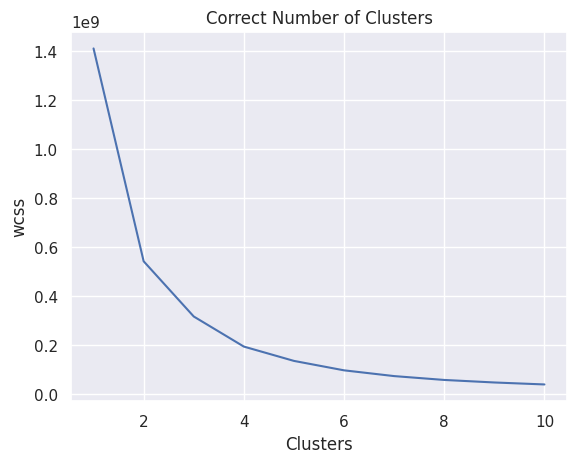

In [23]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Correct Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show()

### Best number of cluster is 4 based on Graph

### Preliminary training

In [24]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

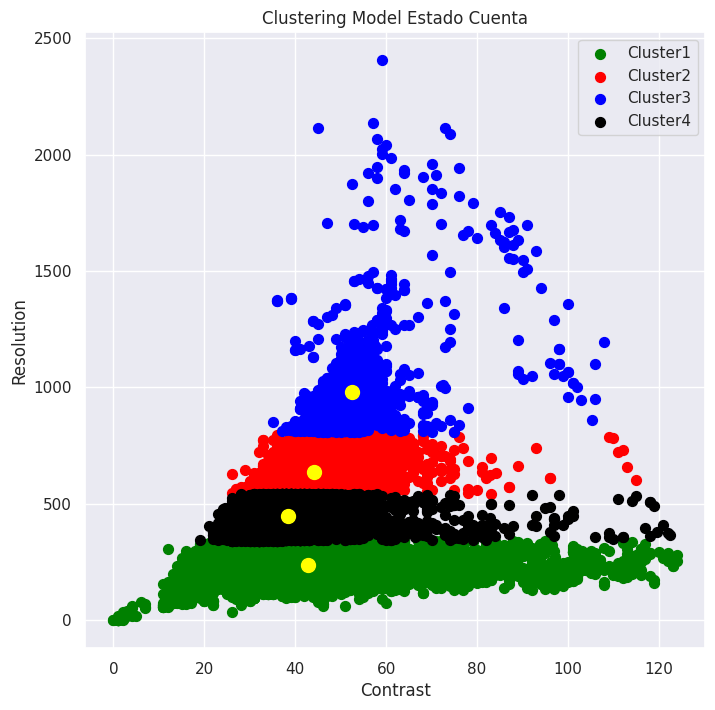

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster2")
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c="blue", label="Cluster3")
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c="black", label="Cluster4")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c="yellow")

plt.legend()
plt.title("Clustering Model Estado Cuenta")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()


The clustering effectively separates the Estado Cuenta data into four distinct groups, with varying patterns in Contrast and Resolution. This suggests meaningful differences in document characteristics, and the clusters can provide valuable insights for further analysis or classification tasks.

## Model- Recibo de Nomina

In [26]:
filt_df_recibo_nomina.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
1,recibo_nomina,NaN,1,15.0,0.0,0.948,0.931,0.943,399.0,42.0,17045.0,672.0,IMSS
2,recibo_nomina,NaN,1,15.0,3.0,0.941,0.837,0.910,166.0,29.0,4866.0,233.0,IMSS
14,recibo_nomina,NaN,1,15.0,0.0,0.973,0.785,0.917,370.0,37.0,14051.0,597.0,IMSS
15,recibo_nomina,NaN,1,15.0,0.0,0.973,0.770,0.912,328.0,36.0,11983.0,538.0,IMSS
43,recibo_nomina,NaN,1,15.0,1.0,0.969,0.745,0.902,711.0,59.0,42005.0,1071.0,IMSS3


In [27]:
filt_df_recibo_nomina.drop(columns=["Model","ClassId"], inplace=True)
filt_df_recibo_nomina

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
1,1,15.0,0.0,0.948,0.931,0.943,399.000000,42.000000,17045.000000,672.000000,IMSS
2,1,15.0,3.0,0.941,0.837,0.910,166.000000,29.000000,4866.000000,233.000000,IMSS
14,1,15.0,0.0,0.973,0.785,0.917,370.000000,37.000000,14051.000000,597.000000,IMSS
15,1,15.0,0.0,0.973,0.770,0.912,328.000000,36.000000,11983.000000,538.000000,IMSS
43,1,15.0,1.0,0.969,0.745,0.902,711.000000,59.000000,42005.000000,1071.000000,IMSS3
...,...,...,...,...,...,...,...,...,...,...,...
62937,1,0.0,0.0,0.999,0.799,0.939,126.769108,42.320780,5364.967501,389.118647,ISSSTE
62938,1,0.0,0.0,0.999,0.785,0.935,126.069405,42.003501,5295.356420,384.030618,ISSSTE
62950,1,0.0,0.0,0.941,0.644,0.852,368.489271,45.789754,16873.033040,301.593351,IMSS
62955,1,0.0,0.0,0.999,0.800,0.939,160.990592,43.946808,7075.022648,433.700159,ISSSTE


In [28]:
filt_df_estado_cuenta["DocType"].value_counts()

,count
DocType,
EC,26556
APP,4261
SUC,2581
ATM,742


In [29]:
filt_df_recibo_nomina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10193 entries, 1 to 62956
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  10193 non-null  int64  
 1   Fields          10193 non-null  float64
 2   EmptyFields     10193 non-null  float64
 3   ConfR           10193 non-null  float64
 4   ConfA           10193 non-null  float64
 5   ConfW           10193 non-null  float64
 6   Sharpness       10193 non-null  float64
 7   Contrast        10193 non-null  float64
 8   Clarity         10193 non-null  float64
 9   Resolution      10193 non-null  float64
 10  DocType         10193 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.2+ MB


### Codification OneHot for categorical columns

In [30]:
df_recibo_nomina_coded = pd.get_dummies(filt_df_recibo_nomina, columns=["DocType"], drop_first=False)
df_recibo_nomina_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_IMSS,DocType_IMSS3,DocType_ISSSTE,DocType_PEMEX,DocType_SEP
1,1,15.0,0.0,0.948,0.931,0.943,399.000000,42.000000,17045.000000,672.000000,True,False,False,False,False
2,1,15.0,3.0,0.941,0.837,0.910,166.000000,29.000000,4866.000000,233.000000,True,False,False,False,False
14,1,15.0,0.0,0.973,0.785,0.917,370.000000,37.000000,14051.000000,597.000000,True,False,False,False,False
15,1,15.0,0.0,0.973,0.770,0.912,328.000000,36.000000,11983.000000,538.000000,True,False,False,False,False
43,1,15.0,1.0,0.969,0.745,0.902,711.000000,59.000000,42005.000000,1071.000000,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62937,1,0.0,0.0,0.999,0.799,0.939,126.769108,42.320780,5364.967501,389.118647,False,False,True,False,False
62938,1,0.0,0.0,0.999,0.785,0.935,126.069405,42.003501,5295.356420,384.030618,False,False,True,False,False
62950,1,0.0,0.0,0.941,0.644,0.852,368.489271,45.789754,16873.033040,301.593351,True,False,False,False,False
62955,1,0.0,0.0,0.999,0.800,0.939,160.990592,43.946808,7075.022648,433.700159,False,False,True,False,False


In [31]:
df_recibo_nomina_coded.isnull().sum()

,0
PagesProcessed,0
Fields,0
EmptyFields,0
ConfR,0
ConfA,0
ConfW,0
Sharpness,0
Contrast,0
Clarity,0
Resolution,0


## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [32]:
X = df_recibo_nomina_coded.iloc[:,[7,9]].values

In [33]:
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

In [34]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

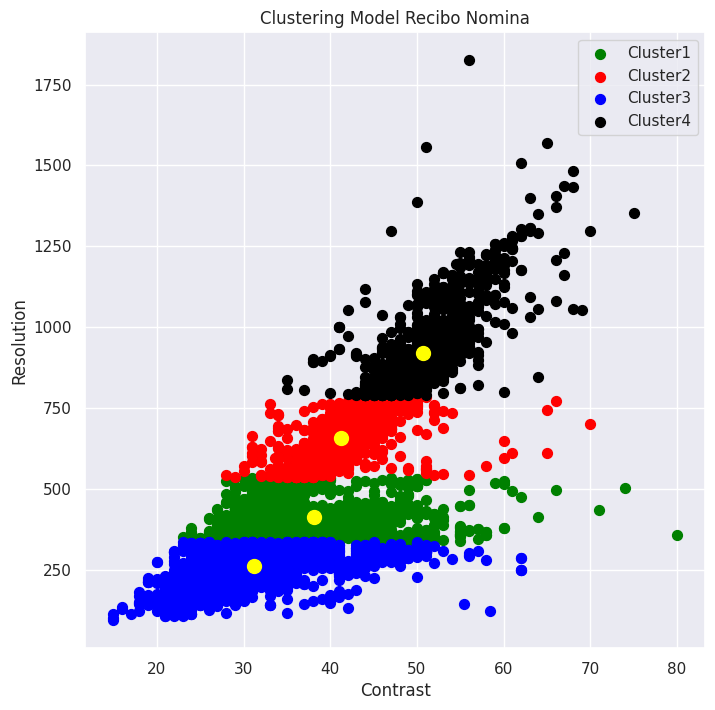

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster2")
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c="blue", label="Cluster3")
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c="black", label="Cluster4")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c="yellow")

plt.legend()
plt.title("Clustering Model Recibo Nomina")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

The clustering of Recibo Nomina data using Contrast and Resolution reveals four clear groups, indicating meaningful separations in the dataset. The compact clusters and distinct centroids suggest that the k-means model effectively captured the data structure. These results highlight the relevance of the chosen features and provide a basis for further categorization or validation.

## Model- INE

clusters the INE data using the Contrast (X-axis) and Resolution (Y-axis) features with the k-means algorithm. It calculates the WCSS for 1 to 10 clusters to determine the optimal number of clusters and selects 2 clusters (n_clusters=2). The data points are plotted, with each cluster represented by distinct colors (green and red), and the cluster centroids are highlighted in yellow.

In [36]:
filt_df_ine.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
3,ine,NaN,1,38.0,11.0,0.914,0.925,0.917,157.0,38.0,6140.0,356.0,INE
7,ine,NaN,1,38.0,11.0,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE
9,ine,NaN,1,38.0,11.0,0.849,0.873,0.856,174.0,41.0,7275.0,394.0,INE
16,ine,NaN,1,38.0,11.0,0.834,0.922,0.860,60.0,50.0,3054.0,354.0,INE
22,ine,NaN,1,38.0,7.0,0.921,0.912,0.918,92.0,47.0,4423.0,422.0,INE


In [37]:
filt_df_ine.drop(columns=["Model","ClassId"], inplace=True)
filt_df_ine

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
3,1,38.0,11.0,0.914,0.925,0.917,157.000000,38.000000,6140.000000,356.000000,INE
7,1,38.0,11.0,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,INE
9,1,38.0,11.0,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,INE
16,1,38.0,11.0,0.834,0.922,0.860,60.000000,50.000000,3054.000000,354.000000,INE
22,1,38.0,7.0,0.921,0.912,0.918,92.000000,47.000000,4423.000000,422.000000,INE
...,...,...,...,...,...,...,...,...,...,...,...
62953,1,0.0,0.0,0.921,0.898,0.914,16.025871,54.774901,877.815515,292.559381,INE
62954,1,0.0,0.0,0.890,0.858,0.880,154.003011,54.145711,8338.602571,748.116796,INE
62957,1,0.0,0.0,0.919,0.876,0.906,62.585067,32.024602,2004.261874,207.442956,INE
62958,1,0.0,0.0,0.890,0.897,0.892,65.723136,45.672921,3001.767591,570.779433,INE


In [38]:
filt_df_ine["DocType"].value_counts()

,count
DocType,
INE,9336
PASS,10


In [39]:
filt_df_ine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9346 entries, 3 to 62959
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  9346 non-null   int64  
 1   Fields          9346 non-null   float64
 2   EmptyFields     9346 non-null   float64
 3   ConfR           9346 non-null   float64
 4   ConfA           9346 non-null   float64
 5   ConfW           9346 non-null   float64
 6   Sharpness       9346 non-null   float64
 7   Contrast        9346 non-null   float64
 8   Clarity         9346 non-null   float64
 9   Resolution      9346 non-null   float64
 10  DocType         9346 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.1+ MB


In [40]:
df_ine_coded = pd.get_dummies(filt_df_ine, columns=["DocType"], drop_first=False)
df_ine_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_INE,DocType_PASS
3,1,38.0,11.0,0.914,0.925,0.917,157.000000,38.000000,6140.000000,356.000000,True,False
7,1,38.0,11.0,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,True,False
9,1,38.0,11.0,0.849,0.873,0.856,174.000000,41.000000,7275.000000,394.000000,True,False
16,1,38.0,11.0,0.834,0.922,0.860,60.000000,50.000000,3054.000000,354.000000,True,False
22,1,38.0,7.0,0.921,0.912,0.918,92.000000,47.000000,4423.000000,422.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
62953,1,0.0,0.0,0.921,0.898,0.914,16.025871,54.774901,877.815515,292.559381,True,False
62954,1,0.0,0.0,0.890,0.858,0.880,154.003011,54.145711,8338.602571,748.116796,True,False
62957,1,0.0,0.0,0.919,0.876,0.906,62.585067,32.024602,2004.261874,207.442956,True,False
62958,1,0.0,0.0,0.890,0.897,0.892,65.723136,45.672921,3001.767591,570.779433,True,False


In [41]:
df_ine_coded.isnull().sum()

,0
PagesProcessed,0
Fields,0
EmptyFields,0
ConfR,0
ConfA,0
ConfW,0
Sharpness,0
Contrast,0
Clarity,0
Resolution,0


## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [42]:
 X = df_ine_coded.iloc[:,[7,9]].values
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=2, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

In [68]:
X

array([[ 42.        , 672.        ],
       [ 29.        , 233.        ],
       [ 37.        , 597.        ],
       ...,
       [ 45.78975397, 301.59335097],
       [ 43.94680803, 433.70015898],
       [ 43.28757889, 407.62193991]])

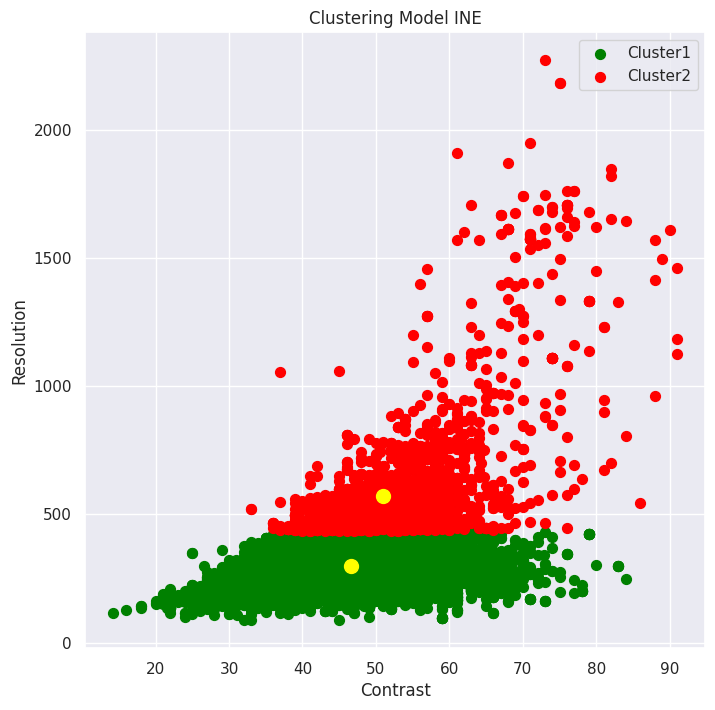

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y={}=0, 0], X[Y==0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster2")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c="yellow")

plt.legend()
plt.title("Clustering Model INE")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

Results shows two distinct groups based on Contrast and Resolution. The clusters are well-separated, indicating clear differences in the data distribution. This separation could provide insights into distinct patterns within the INE data and support further classification or analysis.

## Model- Comprobante de domicilio

In [44]:
filt_df_comprobante_dom.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,comprobante_domicilio,NaN,1,12.0,0.0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
52,comprobante_domicilio,NaN,1,12.0,0.0,0.988,0.674,0.894,157.0,32.0,5066.0,340.0,CABLE
85,comprobante_domicilio,NaN,1,12.0,0.0,0.999,0.761,0.928,566.0,59.0,33499.0,682.0,CFE
122,comprobante_domicilio,NaN,1,12.0,0.0,0.988,0.759,0.919,129.0,40.0,5214.0,302.0,CFE
125,comprobante_domicilio,NaN,1,12.0,0.0,0.996,0.763,0.926,104.0,45.0,4755.0,364.0,CFE


In [45]:
filt_df_comprobante_dom.drop(columns=["Model","ClassId"], inplace=True)
filt_df_comprobante_dom

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,1,12.0,0.0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
52,1,12.0,0.0,0.988,0.674,0.894,157.0,32.0,5066.0,340.0,CABLE
85,1,12.0,0.0,0.999,0.761,0.928,566.0,59.0,33499.0,682.0,CFE
122,1,12.0,0.0,0.988,0.759,0.919,129.0,40.0,5214.0,302.0,CFE
125,1,12.0,0.0,0.996,0.763,0.926,104.0,45.0,4755.0,364.0,CFE
...,...,...,...,...,...,...,...,...,...,...,...
61478,1,0.0,0.0,0.993,0.794,0.933,117.0,47.0,5577.0,399.0,CFE
61602,1,0.0,0.0,0.990,0.728,0.911,130.0,56.0,7378.0,498.0,CFE
61604,1,0.0,0.0,0.996,0.808,0.939,170.0,46.0,7907.0,536.0,CFE
61613,1,0.0,0.0,0.998,0.689,0.905,97.0,54.0,5350.0,501.0,CFE


In [46]:
filt_df_comprobante_dom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5780 entries, 0 to 61619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  5780 non-null   int64  
 1   Fields          5780 non-null   float64
 2   EmptyFields     5780 non-null   float64
 3   ConfR           5780 non-null   float64
 4   ConfA           5780 non-null   float64
 5   ConfW           5780 non-null   float64
 6   Sharpness       5780 non-null   float64
 7   Contrast        5780 non-null   float64
 8   Clarity         5780 non-null   float64
 9   Resolution      5780 non-null   float64
 10  DocType         5780 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 670.9+ KB


In [47]:
df_comprobante_dom_coded = pd.get_dummies(filt_df_comprobante_dom, columns=["DocType"], drop_first=False)
df_comprobante_dom_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_AGUA,DocType_CABLE,DocType_CFE,DocType_CONST,DocType_GAS,DocType_TEL
0,1,12.0,0.0,0.981,0.674,0.889,64.0,38.0,2523.0,263.0,False,False,True,False,False,False
52,1,12.0,0.0,0.988,0.674,0.894,157.0,32.0,5066.0,340.0,False,True,False,False,False,False
85,1,12.0,0.0,0.999,0.761,0.928,566.0,59.0,33499.0,682.0,False,False,True,False,False,False
122,1,12.0,0.0,0.988,0.759,0.919,129.0,40.0,5214.0,302.0,False,False,True,False,False,False
125,1,12.0,0.0,0.996,0.763,0.926,104.0,45.0,4755.0,364.0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61478,1,0.0,0.0,0.993,0.794,0.933,117.0,47.0,5577.0,399.0,False,False,True,False,False,False
61602,1,0.0,0.0,0.990,0.728,0.911,130.0,56.0,7378.0,498.0,False,False,True,False,False,False
61604,1,0.0,0.0,0.996,0.808,0.939,170.0,46.0,7907.0,536.0,False,False,True,False,False,False
61613,1,0.0,0.0,0.998,0.689,0.905,97.0,54.0,5350.0,501.0,False,False,True,False,False,False


In [48]:
df_comprobante_dom_coded.isnull().sum()

,0
PagesProcessed,0
Fields,0
EmptyFields,0
ConfR,0
ConfA,0
ConfW,0
Sharpness,0
Contrast,0
Clarity,0
Resolution,0


## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

processes and clusters the Comprobante de Domicilio dataset using the Contrast (X-axis) and Resolution (Y-axis) features. After dropping irrelevant columns (Model and ClassId), the DocType variable is one-hot encoded, and null values are checked to ensure data consistency. Using the k-means algorithm, the WCSS is calculated for 1 to 10 clusters to determine the optimal number, with 6 clusters selected based on the elbow method. The clusters are visualized in a scatter plot, with each group shown in distinct colors, and their centroids are highlighted in yellow.

In [49]:
 X = df_comprobante_dom_coded.iloc[:,[7,9]].values
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=6, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

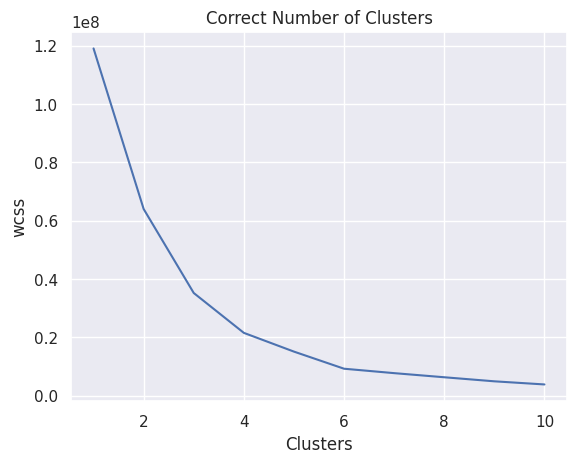

In [50]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Correct Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show()

The clustering reveals six distinct groups based on Contrast and Resolution, indicating clear separations in the dataset. This clustering can be used to analyze patterns or similarities within the Comprobante de Domicilio data, providing meaningful insights for classification or further analysis.

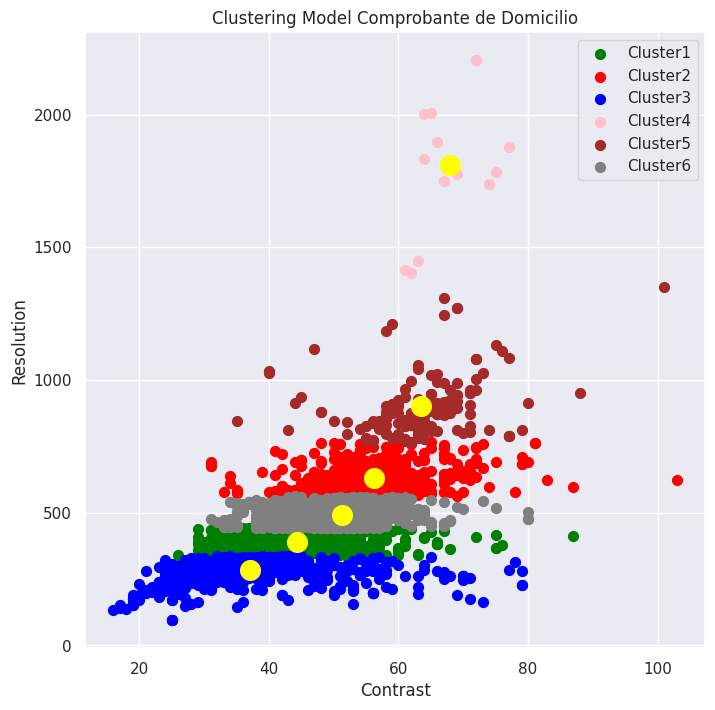

In [51]:
plt.figure(figsize=(8,8))


plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c="red", label="Cluster2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c="blue", label="Cluster3")
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c="pink", label="Cluster4")
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c="brown", label="Cluster5")
plt.scatter(X[Y == 5, 0], X[Y == 5, 1], s=50, c="gray", label="Cluster6")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="yellow")

plt.legend()
plt.title("Clustering Model Comprobante de Domicilio")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

## Model- Carta Libranza

Processes the Carta Libranza dataset to cluster data points using Contrast (X-axis) and Resolution (Y-axis). After preparing the data by dropping irrelevant columns (Model and ClassId) and one-hot encoding DocType, the k-means algorithm is applied. The WCSS is calculated for 1 to 10 clusters to determine the optimal number of clusters, and based on the elbow method, 3 clusters are chosen. The clusters are visualized, with each group represented by distinct colors, and the centroids are highlighted in yellow

In [52]:
filt_df_carta_lib.head()

,Model,ClassId,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
6,carta_libranza,NaN,1,19.0,0.0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,CLIB
8,carta_libranza,NaN,1,19.0,0.0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,CLIB
21,carta_libranza,NaN,1,19.0,0.0,0.995,0.978,0.990,1127.0,51.0,57854.0,371.0,CLIB
23,carta_libranza,NaN,1,19.0,0.0,0.996,0.976,0.990,1131.0,51.0,58111.0,373.0,CLIB
25,carta_libranza,NaN,1,19.0,0.0,0.999,0.943,0.982,1487.0,54.0,80796.0,493.0,CLIB


In [53]:
filt_df_carta_lib.drop(columns=["Model","ClassId"], inplace=True)
filt_df_carta_lib

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
6,1,19.0,0.0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,CLIB
8,1,19.0,0.0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,CLIB
21,1,19.0,0.0,0.995,0.978,0.990,1127.0,51.0,57854.0,371.0,CLIB
23,1,19.0,0.0,0.996,0.976,0.990,1131.0,51.0,58111.0,373.0,CLIB
25,1,19.0,0.0,0.999,0.943,0.982,1487.0,54.0,80796.0,493.0,CLIB
...,...,...,...,...,...,...,...,...,...,...,...
61593,1,0.0,0.0,0.999,0.963,0.988,1319.0,52.0,69890.0,437.0,CLIB
61595,1,0.0,0.0,0.999,0.962,0.988,1331.0,53.0,70704.0,441.0,CLIB
61597,1,0.0,0.0,0.995,0.965,0.986,1124.0,51.0,57717.0,371.0,CLIB
61599,1,0.0,0.0,0.990,0.961,0.981,1115.0,51.0,57117.0,369.0,CLIB


In [54]:
filt_df_carta_lib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 6 to 61601
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PagesProcessed  3501 non-null   int64  
 1   Fields          3501 non-null   float64
 2   EmptyFields     3501 non-null   float64
 3   ConfR           3501 non-null   float64
 4   ConfA           3501 non-null   float64
 5   ConfW           3501 non-null   float64
 6   Sharpness       3501 non-null   float64
 7   Contrast        3501 non-null   float64
 8   Clarity         3501 non-null   float64
 9   Resolution      3501 non-null   float64
 10  DocType         3501 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 457.3+ KB


In [55]:
df_carta_lib_coded = pd.get_dummies(filt_df_carta_lib, columns=["DocType"], drop_first=False)
df_carta_lib_coded

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_CLIB
6,1,19.0,0.0,0.993,0.975,0.987,1137.0,51.0,58551.0,376.0,True
8,1,19.0,0.0,0.993,0.975,0.988,1137.0,51.0,58551.0,376.0,True
21,1,19.0,0.0,0.995,0.978,0.990,1127.0,51.0,57854.0,371.0,True
23,1,19.0,0.0,0.996,0.976,0.990,1131.0,51.0,58111.0,373.0,True
25,1,19.0,0.0,0.999,0.943,0.982,1487.0,54.0,80796.0,493.0,True
...,...,...,...,...,...,...,...,...,...,...,...
61593,1,0.0,0.0,0.999,0.963,0.988,1319.0,52.0,69890.0,437.0,True
61595,1,0.0,0.0,0.999,0.962,0.988,1331.0,53.0,70704.0,441.0,True
61597,1,0.0,0.0,0.995,0.965,0.986,1124.0,51.0,57717.0,371.0,True
61599,1,0.0,0.0,0.990,0.961,0.981,1115.0,51.0,57117.0,369.0,True


## Taking Doctype for classification

### X axis - Contrast
### y axis - Resolution

In [56]:
 X = df_carta_lib_coded.iloc[:,[7,9]].values
 wcss =[]

 for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

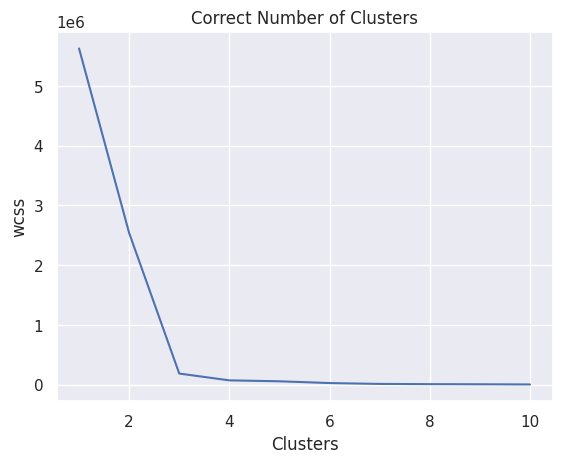

In [57]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Correct Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=3)
Y = kmeans.fit_predict(X)

The clustering for Carta Libranza reveals three distinct groups, showing clear separations in the dataset based on Contrast and Resolution. This clustering approach effectively identifies patterns within the data, providing meaningful insights for further classification or analysis. The elbow method validates the selection of 3 clusters as optimal

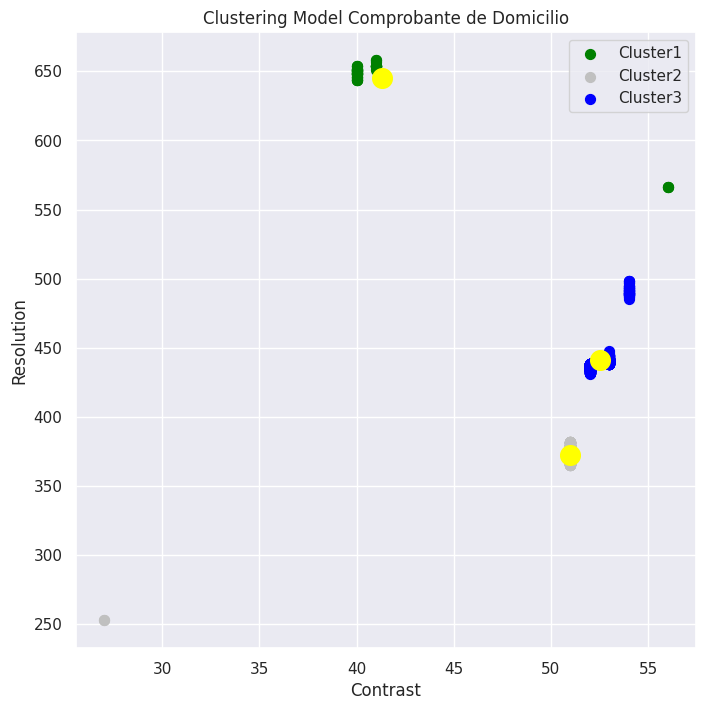

In [59]:
plt.figure(figsize=(8,8))


plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c="green", label="Cluster1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c="silver", label="Cluster2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c="blue", label="Cluster3")



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="yellow")

plt.legend()
plt.title("Clustering Model Comprobante de Domicilio")
plt.xlabel("Contrast")
plt.ylabel("Resolution")
plt.show()

## Conclusions

- **No Missing Values**:  
  The dataframe does not contain any missing values, so no additional data imputation was necessary during the process.

- **Outliers and PCA**:  
  The data analysis verified that the information in the dataframe does not contain significant outliers. After applying Principal Component Analysis (PCA) on the entire dataframe, we found that the current columns explain more than 80% of the variation in our model. This analysis is documented in the `FE_transformation.ipynb` file located in this folder.

- **Categorical Data Encoding**:  
  Since we are applying clustering, One-Hot Encoding was chosen for categorical variables, as it has shown good results when used in conjunction with clustering algorithms.

- **WCSS for Clustering**:  
  While WCSS (Within-Cluster Sum of Squares) is not listed as a recommended feature engineering method for this activity, it played a crucial role in ensuring that the number of clusters chosen for each model was the most optimal.

- **KMeans Clustering Implementation**:  
  We started implementing model training based on KMeans clustering to assess the cluster performance across our models. The results so far are promising in terms of correct distributions, but there are still a few aspects that need to be confirmed with our tutor. Some of the questions we intend to discuss include:
  
    1. Our preliminary clustering analysis using KMeans shows good results, but we are only plotting two variables (Resolution and Contrast) for all models. Is it necessary to demonstrate clustering performance with additional variables?
    
    2. Besides KMeans, are there other clustering methods you would recommend exploring to further differentiate the performance of the models?


# Agglomerative Clustering


Agglomerative Clustering is a hierarchical clustering algorithm, meaning it builds a tree-like structure (dendrogram) that visually represents the merging of clusters.it is powerful because it is flexible, interpretative, and scalable to many different kinds of data.

#Considerations for implementation:

*   Don’t know the exact number of clusters in advance.
*   flexibility in the types of clusters
*   Want to use a variety of distance metrics.
*   Need a hierarchical approach that allows for deeper insight into how clusters are formed.
*   Work with smaller to moderately-sized datasets and need better interpretability.
*   Want to preserve outliers as separate entities.

In [60]:
df_recibo_nomina_coded.head(3)

,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType_IMSS,DocType_IMSS3,DocType_ISSSTE,DocType_PEMEX,DocType_SEP
1,1,15.0,0.0,0.948,0.931,0.943,399.0,42.0,17045.0,672.0,True,False,False,False,False
2,1,15.0,3.0,0.941,0.837,0.910,166.0,29.0,4866.0,233.0,True,False,False,False,False
14,1,15.0,0.0,0.973,0.785,0.917,370.0,37.0,14051.0,597.0,True,False,False,False,False


Agglomerative Cluster Labels:  [1 2 0 ... 4 4 4]


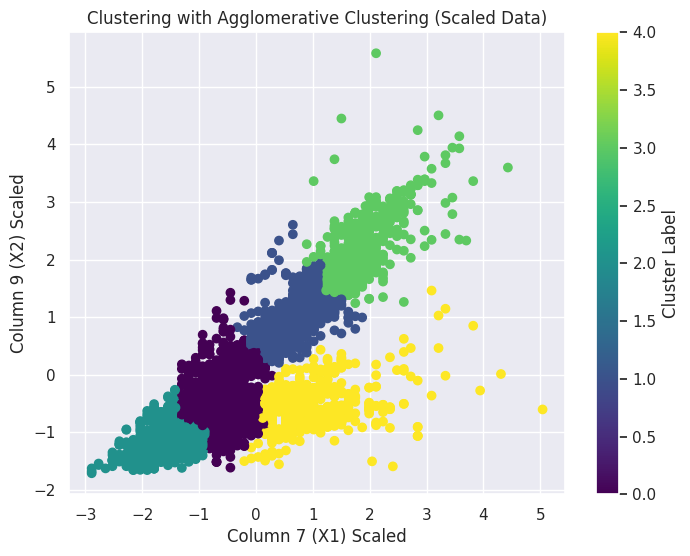

In [61]:
# 1. Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 2. Define the data X (assuming you already have X)
X = df_recibo_nomina_coded.iloc[:, [7, 9]].values  # Change this if necessary

# 3. Scale the data (this is important so that distances are not biased by the different scales of the columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Create the Agglomerative Clustering model with the desired number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Change the number of clusters if necessary

# 5. Fit the model to the scaled data
Y = agg_clustering.fit_predict(X_scaled)

# 6. View the cluster labels
print("Agglomerative Cluster Labels: ", Y)

# 7. Visualize the results
plt.figure(figsize=(8, 6))

# Cluster points are plotted in different colors
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis', marker='o')

# Add labels and title
plt.title('Clustering with Agglomerative Clustering (Scaled Data)')
plt.xlabel('Column 7 (X1) Scaled')
plt.ylabel('Column 9 (X2) Scaled')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()


#Find the optimal number of clusters

As mentioned before dendrogram provides a visual and intuitive way to find the optimal number of clusters by highlighting the natural groupings in the data, making it a valuable tool for hierarchical clustering.


In this case the dendogram chart shows 4 to 5 main groups, depending on considerations we can work with either number of clusters.  Worth to mention that 4 clusters were the optimal for K MEANS model in previous section.





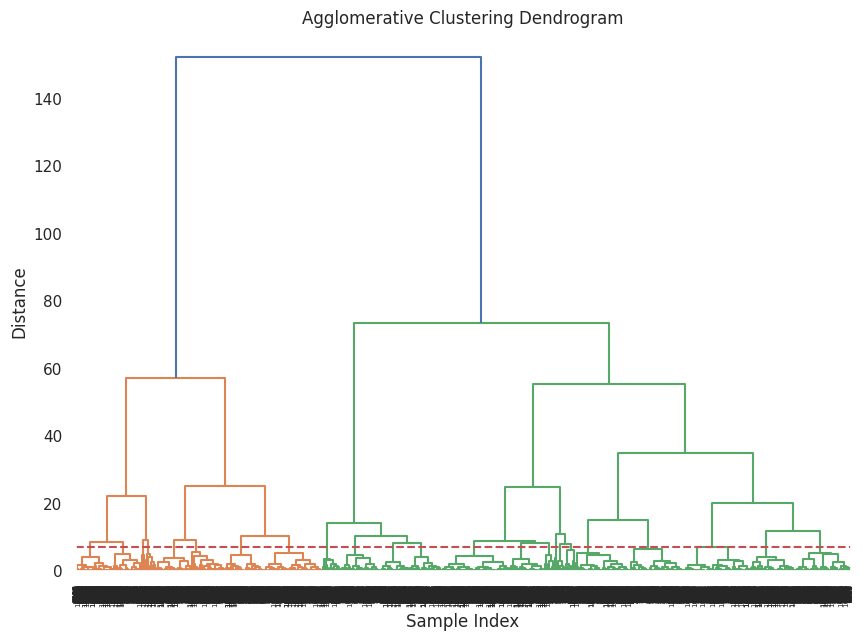

In [62]:
# Create a dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
Z = sch.linkage(X_scaled, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)

# Cut the dendrogram at a specific height (e.g., y=7)
plt.axhline(y=7, color='r', linestyle='--')  # The horizontal line indicates the cut

# Display the dendrogram
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



#CONCLUSIONS:

Agglomerative Clustering allows a more explorative approach, the implementation of the model was based on the the  advantages:


Flexible cluster numbers: Unlike algorithms like K-means, which require the number of clusters to be predefined, agglomerative clustering allows for an exploratory approach where the number of clusters can be chosen post hoc, based on the dendrogram.


Detailed Cluster Insight: The hierarchical structure provides more interpretability about how clusters are formed and merged, which can be particularly valuable when you need to understand the relationships between groups at different levels of similarity.

#Clustering for Recibo de Nómina

In [89]:
# Import necessary libraries
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

def agglomerative_clustering_dynamic(X, distance_threshold=30):
    """
    Perform Agglomerative Clustering dynamically on the given data based on a dendrogram.

    Parameters:
    - X: DataFrame or 2D array of input data.
    - distance_threshold: The distance where the dendrogram should be cut to define clusters.

    Returns:
    - Y: Array of cluster labels.
    """
    # 1. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 2. Perform hierarchical/agglomerative clustering
    Z = sch.linkage(X_scaled, method='ward')

    # 3. Create a dendrogram
    plt.figure(figsize=(10, 7))
    sch.dendrogram(Z)

    # 4. Add a horizontal line for the cutting threshold
    plt.axhline(y=distance_threshold, color='r', linestyle='--')  # Adjust distance_threshold for clusters
    plt.title('Dendrogram for Agglomerative Clustering')
    plt.xlabel('Index of Samples')
    plt.ylabel('Distance')
    plt.show()

    # 5. Perform Agglomerative Clustering with a dynamic number of clusters determined by the threshold
    agg_clustering = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
    Y = agg_clustering.fit_predict(X_scaled)

    # 6. Print the cluster labels
    print("Agglomerative Cluster Labels: ", Y)

    # 7. Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis', marker='o')
    plt.title('Clustering with Agglomerative Clustering (Scaled Data)')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Return the cluster labels
    return Y


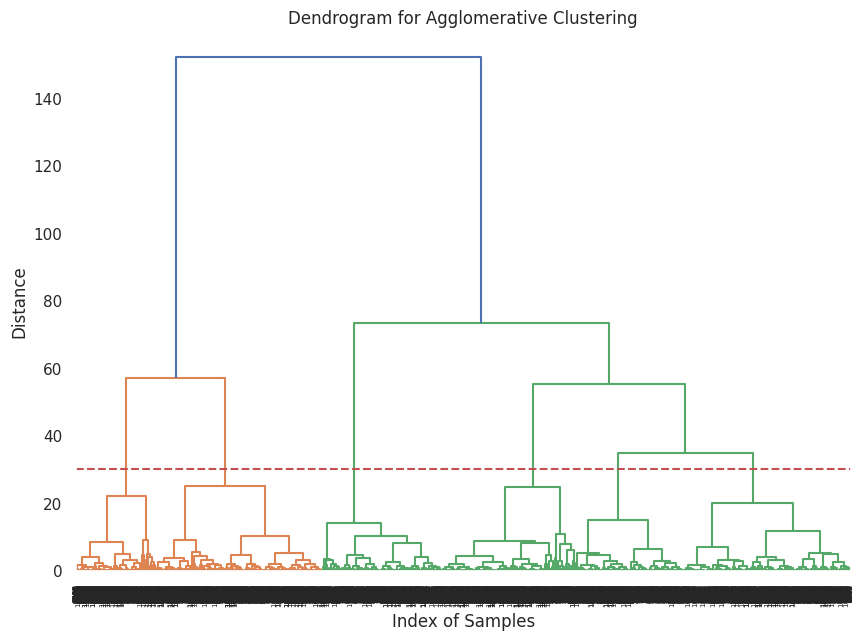

Agglomerative Cluster Labels:  [0 5 2 ... 1 1 1]


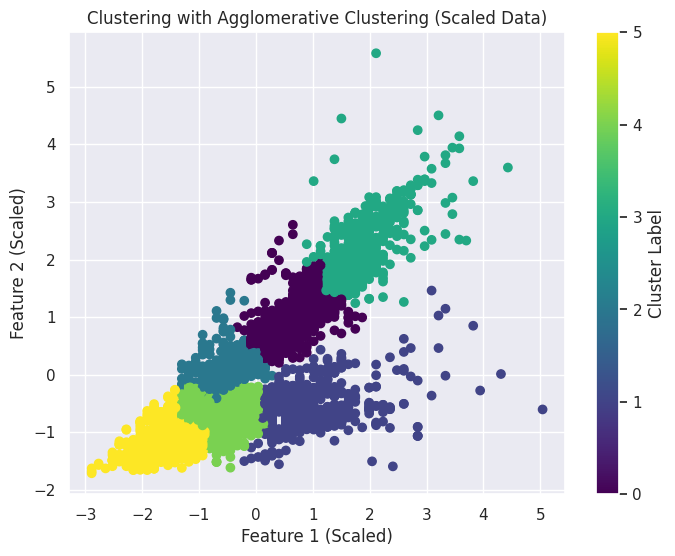

array([0, 5, 2, ..., 1, 1, 1])

In [90]:
X =df_recibo_nomina_coded.iloc[:, [7, 9]].values
agglomerative_clustering_dynamic(X)

#Clustering for Comprobante de domicilio

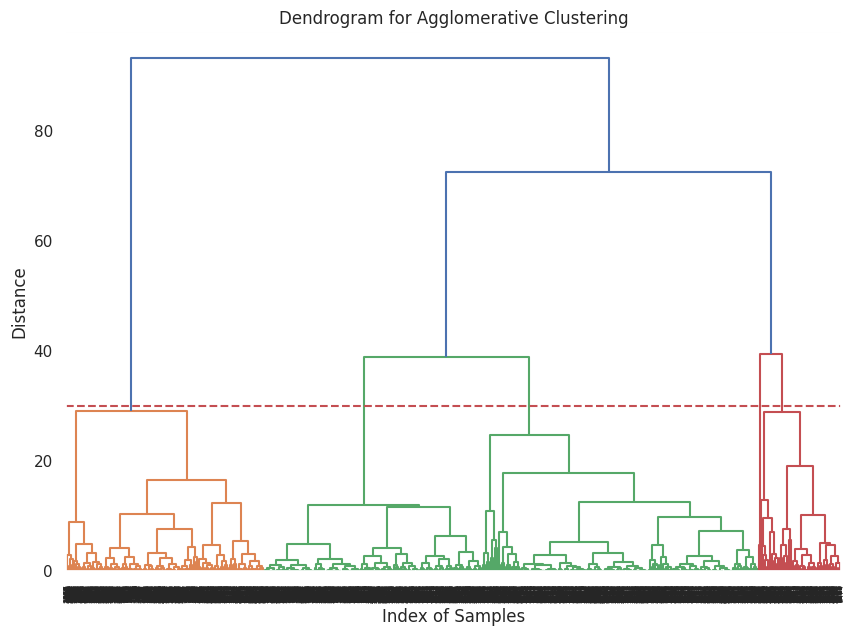

Agglomerative Cluster Labels:  [0 0 2 ... 1 1 1]


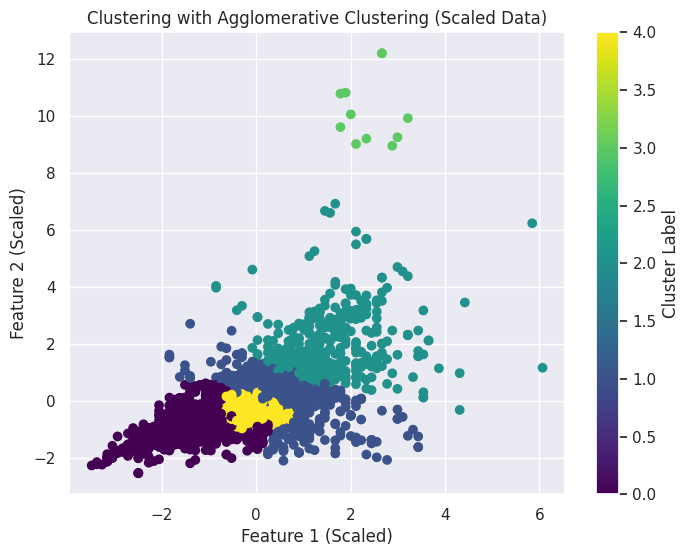

array([0, 0, 2, ..., 1, 1, 1])

In [91]:
X =df_comprobante_dom_coded.iloc[:,[7,9]].values
agglomerative_clustering_dynamic(X)

#Clustering for INE

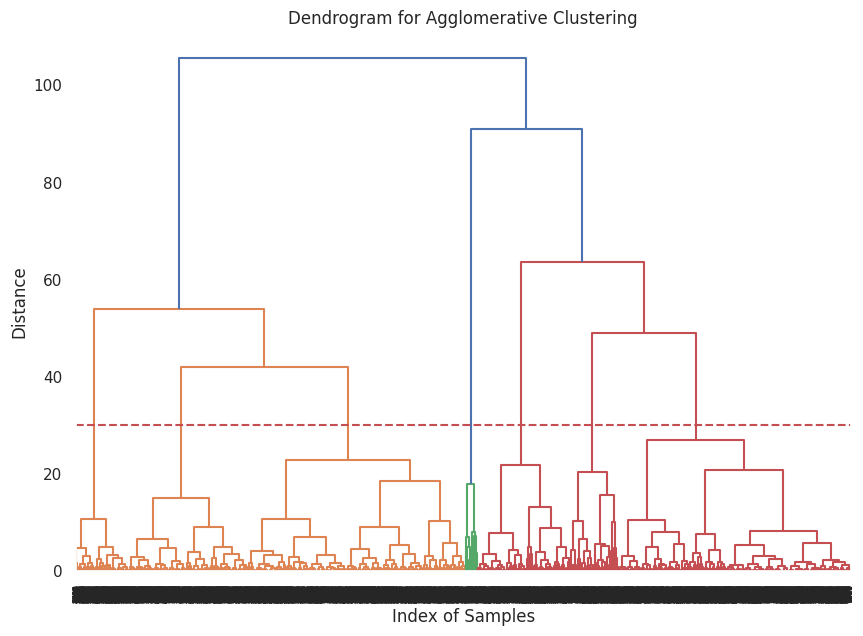

Agglomerative Cluster Labels:  [1 1 1 ... 4 0 0]


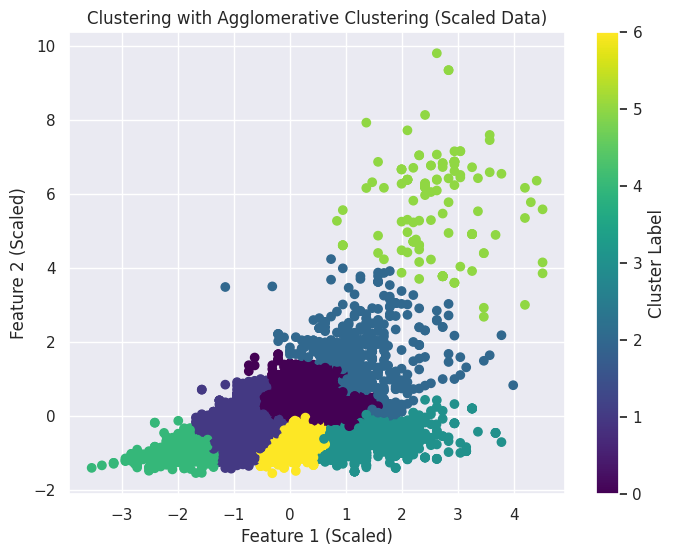

array([1, 1, 1, ..., 4, 0, 0])

In [92]:
X =df_ine_coded.iloc[:,[7,9]].values
agglomerative_clustering_dynamic(X)

#DBSCAN

A key advantage of DBSCAN is that it does not require you to specify the number of clusters in advance. Instead, DBSCAN identifies clusters based on the density of points. This is useful when you don't know how many clusters there are in the data or when the number of clusters is not obvious.



## FINDINGS

DBSCAN is not the right fit for this Data, even trying various combinations on main parameters(min_sample,eps) the model was generating 1 single cluster for all Data.



 ### Possible reasons

* it's possible that DBSCAN has marked most or all points as noise (labeled as -1).

* If the data points are all very close to each other, DBSCAN may consider all of them as one large dense region, resulting in all points being marked with the same label (cluster 0). This could happen even if the data is from different clusters, as DBSCAN's density-based approach assumes clusters are regions of high point density.







Cluster labels:  [  0   1   2 ...  -1 286  -1]


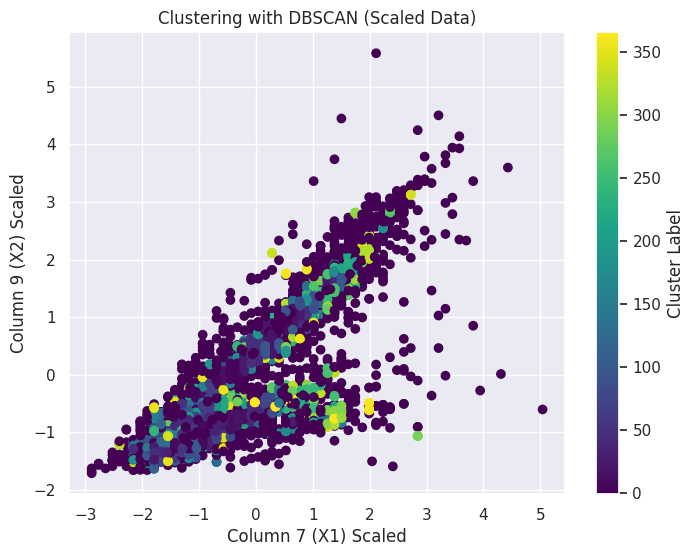

In [63]:
# 1. Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 2. Define the data X (assuming you already have X)
X = df_recibo_nomina_coded.iloc[:, [7, 9]].values

# 3. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Create the DBSCAN model with adjusted values for eps and min_samples
# Adjust the values of eps and min_samples based on the results you want to obtain
dbscan = DBSCAN(eps=0.015, min_samples=3)

# 5. Fit the DBSCAN model to the scaled data
Y = dbscan.fit_predict(X_scaled)

# 6. View the cluster labels
print("Cluster labels: ", Y)

# 7. Visualize the results
plt.figure(figsize=(8, 6))

# Cluster points are drawn in different colors. -1 is the code for noisy points.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis', marker='o')

# Add labels and title
plt.title('Clustering with DBSCAN (Scaled Data)')
plt.xlabel('Column 7 (X1) Scaled')
plt.ylabel('Column 9 (X2) Scaled')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()


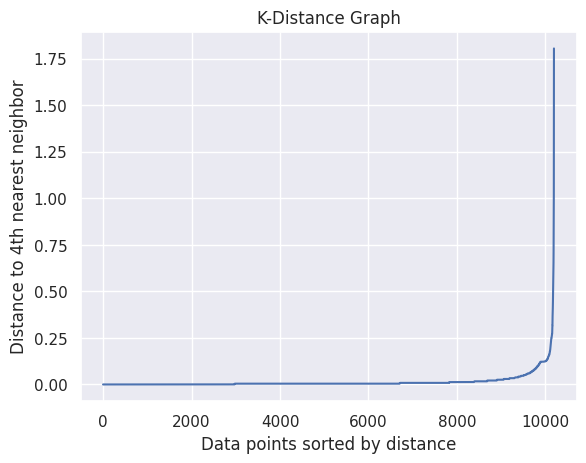

In [64]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate k-distances
k = 4  # you can experiment with this value (k = min_samples)
neigh = NearestNeighbors(n_neighbors=k)
neighbors = neigh.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Sort distances in ascending order
distances = np.sort(distances[:, k-1], axis=0)

# Plot k-distance graph
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data points sorted by distance')
plt.ylabel('Distance to 4th nearest neighbor')
plt.show()


## Even with proper Data Scalation the model din not show a better performance

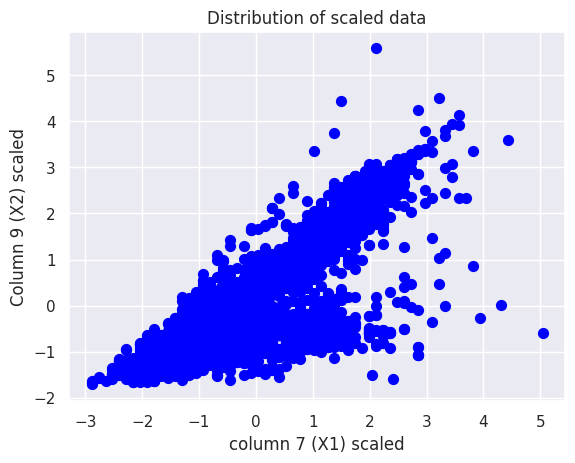

In [65]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', s=50)
plt.title('Distribution of scaled data')
plt.xlabel('column 7 (X1) scaled')
plt.ylabel('Column 9 (X2) scaled')
plt.show()


In [66]:
print( "DBSCAN Cluster labels:",  Y)


DBSCAN Cluster labels: [  0   1   2 ...  -1 286  -1]


# CLUSTERING FOR INE

Model shows the same limitations on defining clusterings for this data sets.


Cluster labels:  [  0   1   1 ... 152  -1 406]


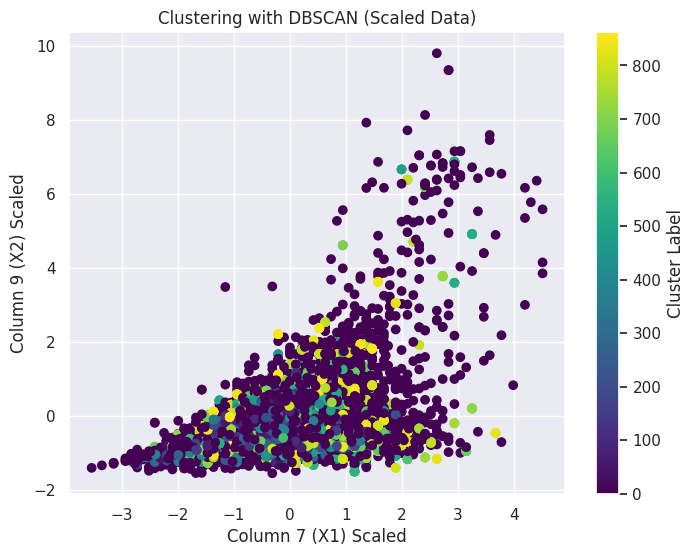

In [93]:
# 1. Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 2. Define the data X (assuming you already have X)
X = df_ine_coded.iloc[:, [7, 9]].values

# 3. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Create the DBSCAN model with adjusted values for eps and min_samples
# Adjust the values of eps and min_samples based on the results you want to obtain
dbscan = DBSCAN(eps=0.015, min_samples=3)

# 5. Fit the DBSCAN model to the scaled data
Y = dbscan.fit_predict(X_scaled)

# 6. View the cluster labels
print("Cluster labels: ", Y)

# 7. Visualize the results
plt.figure(figsize=(8, 6))

# Cluster points are drawn in different colors. -1 is the code for noisy points.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis', marker='o')

# Add labels and title
plt.title('Clustering with DBSCAN (Scaled Data)')
plt.xlabel('Column 7 (X1) Scaled')
plt.ylabel('Column 9 (X2) Scaled')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()


## CONCLUSIONS

DBSCAN is not the right fit for this Data, even trying various combinations on main parameters(min_sample,eps) the model was generating 1 single cluster for all Data.

K MEANS And Agglomerative Clustering delivered optimal results, we will continue the deep dive in those models.

We could consider implement DBSCAN including more features(columns) to see if it can get better results

